In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

In [2]:
cols =["Diagnosis", "radius", "texture",
       "perimeter", "area", "smoothness",
       "compactness", "concavity", "concavePoints",
       "symmetry", "fractal dimension"]

dat_worst = pd.read_csv("wdbc.data", header=None, na_values = "none",
                  usecols = [1,22,23,24,25,26,27,28,29,30,31], names=cols)
dat_worst

Diagnosis  radius  texture  perimeter    area  smoothness  compactness  \
0           M  25.380    17.33     184.60  2019.0     0.16220      0.66560   
1           M  24.990    23.41     158.80  1956.0     0.12380      0.18660   
2           M  23.570    25.53     152.50  1709.0     0.14440      0.42450   
3           M  14.910    26.50      98.87   567.7     0.20980      0.86630   
4           M  22.540    16.67     152.20  1575.0     0.13740      0.20500   
..        ...     ...      ...        ...     ...         ...          ...   
564         M  25.450    26.40     166.10  2027.0     0.14100      0.21130   
565         M  23.690    38.25     155.00  1731.0     0.11660      0.19220   
566         M  18.980    34.12     126.70  1124.0     0.11390      0.30940   
567         M  25.740    39.42     184.60  1821.0     0.16500      0.86810   
568         B   9.456    30.37      59.16   268.6     0.08996      0.06444   

     concavity  concavePoints  symmetry  fractal dimension  
0       0.7119         0.2654    0.4601            0.11890  
1       0.2416         0.1860    0.2750            0.08902  
2       0.4504         0.2430    0.3613            0.08758  
3       0.6869         0.2575    0.6638            0.17300  
4       0.4000         0.1625    0.2364            0.07678  
..         ...            ...       ...                ...  
564     0.4107         0.2216    0.2060            0.07115  
565     0.3215         0.1628    0.2572            0.06637  
566     0.3403         0.1418    0.2218            0.07820  
567     0.9387         0.2650    0.4087            0.12400  
568     0.0000         0.0000    0.2871            0.07039  

[569 rows x 11 columns]

In [3]:

dat_worst.corr()

radius   texture  perimeter      area  smoothness  \
radius             1.000000  0.359921   0.993708  0.984015    0.216574   
texture            0.359921  1.000000   0.365098  0.345842    0.225429   
perimeter          0.993708  0.365098   1.000000  0.977578    0.236775   
area               0.984015  0.345842   0.977578  1.000000    0.209145   
smoothness         0.216574  0.225429   0.236775  0.209145    1.000000   
compactness        0.475820  0.360832   0.529408  0.438296    0.568187   
concavity          0.573975  0.368366   0.618344  0.543331    0.518523   
concavePoints      0.787424  0.359755   0.816322  0.747419    0.547691   
symmetry           0.243529  0.233027   0.269493  0.209146    0.493838   
fractal dimension  0.093492  0.219122   0.138957  0.079647    0.617624   

                   compactness  concavity  concavePoints  symmetry  \
radius                0.475820   0.573975       0.787424  0.243529   
texture               0.360832   0.368366       0.359755  0.233027   
perimeter             0.529408   0.618344       0.816322  0.269493   
area                  0.438296   0.543331       0.747419  0.209146   
smoothness            0.568187   0.518523       0.547691  0.493838   
compactness           1.000000   0.892261       0.801080  0.614441   
concavity             0.892261   1.000000       0.855434  0.532520   
concavePoints         0.801080   0.855434       1.000000  0.502528   
symmetry              0.614441   0.532520       0.502528  1.000000   
fractal dimension     0.810455   0.686511       0.511114  0.537848   

                   fractal dimension  
radius                      0.093492  
texture                     0.219122  
perimeter                   0.138957  
area                        0.079647  
smoothness                  0.617624  
compactness                 0.810455  
concavity                   0.686511  
concavePoints               0.511114  
symmetry                    0.537848  
fractal dimension           1.000000

In [4]:
import matplotlib.pyplot as plt

In [5]:
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

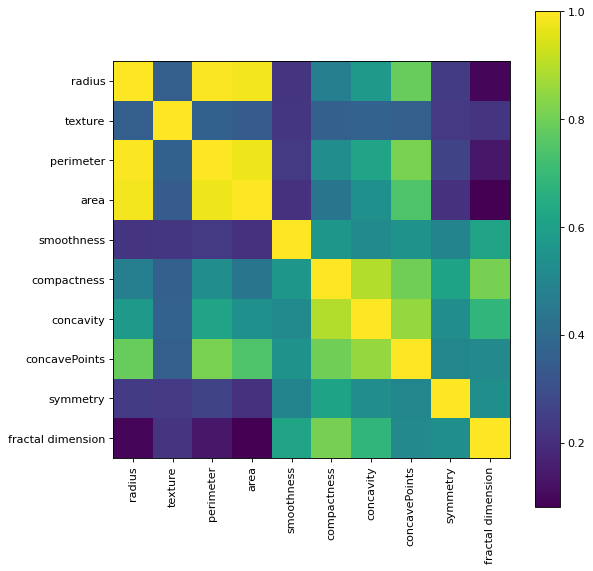

In [6]:
plotCorrelationMatrix(dat_worst, 8)

We will need to drop 2 of the 3 options of area, radius, and perimeter. Additionally, we will likely need to drop 2 of the three options concavePoints, compactness, or concavity.

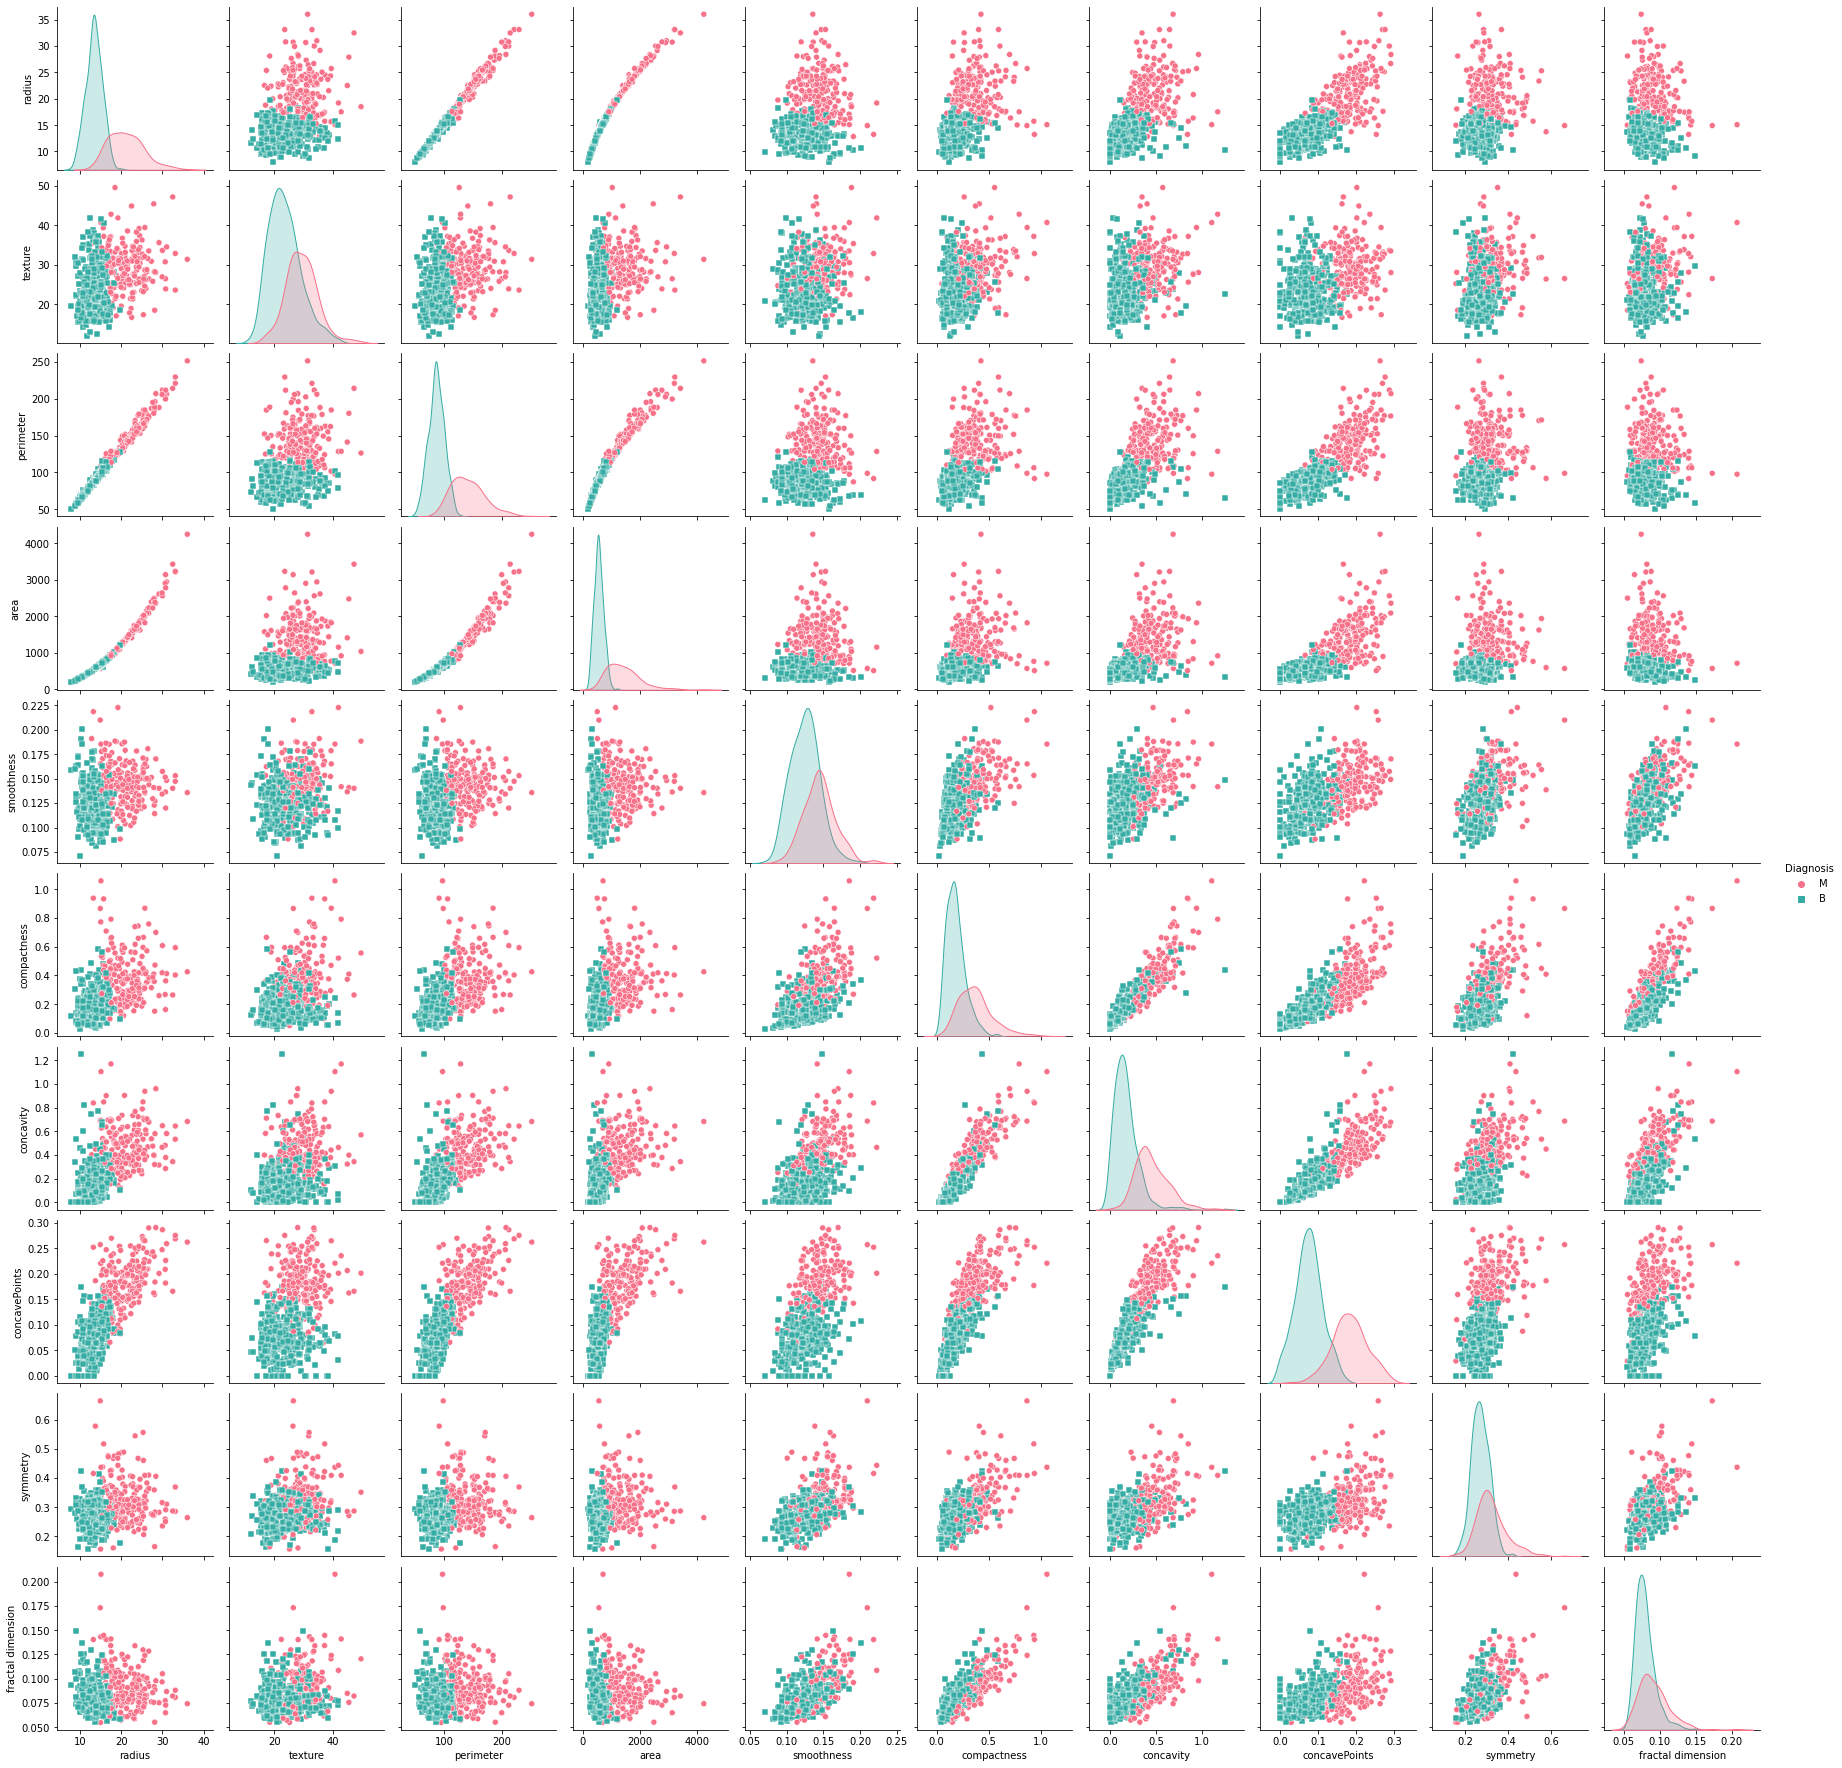

In [7]:
g = sns.pairplot(dat_worst, hue="Diagnosis", palette="husl", markers=["o", "s"])

In [8]:
X_worst=dat_worst.drop(columns=['Diagnosis', 'perimeter','radius', 'fractal dimension',
                    'smoothness', 'concavePoints', 'compactness', 'texture'])
X_worst

area  concavity  symmetry
0    2019.0     0.7119    0.4601
1    1956.0     0.2416    0.2750
2    1709.0     0.4504    0.3613
3     567.7     0.6869    0.6638
4    1575.0     0.4000    0.2364
..      ...        ...       ...
564  2027.0     0.4107    0.2060
565  1731.0     0.3215    0.2572
566  1124.0     0.3403    0.2218
567  1821.0     0.9387    0.4087
568   268.6     0.0000    0.2871

[569 rows x 3 columns]

In [9]:
#https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
from statsmodels.stats.outliers_influence import variance_inflation_factor   

In [10]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X_worst.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_worst.values, i) 
                          for i in range(len(X_worst.columns))] 
  
print(vif_data)

     feature       VIF
0       area  4.457425
1  concavity  4.426045
2   symmetry  4.400901


In [11]:
data_worst = dat_worst[['Diagnosis', 'area', 'concavity', 'symmetry']]

In [12]:
def plot_traces(traces, retain=0):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''
    ax = pm.traceplot(traces[-retain:],
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(traces[-retain:]).iterrows()]))
    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')

In [13]:
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula = 'Diagnosis~area+concavity+symmetry', 
                            data = data_worst, 
                            family = pm.glm.families.Binomial())

    trace = pm.sample(500, step = pm.NUTS(target_accept = 0.99), cores = 6, tune=5000) # change cores if you need to 

Multiprocess sampling (6 chains in 6 jobs)
NUTS: [symmetry, concavity, area, Intercept]


Sampling 6 chains for 5_000 tune and 500 draw iterations (30_000 + 3_000 draws total) took 404 seconds.


In [14]:
trace.varnames

['Intercept', 'area', 'concavity', 'symmetry']

/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


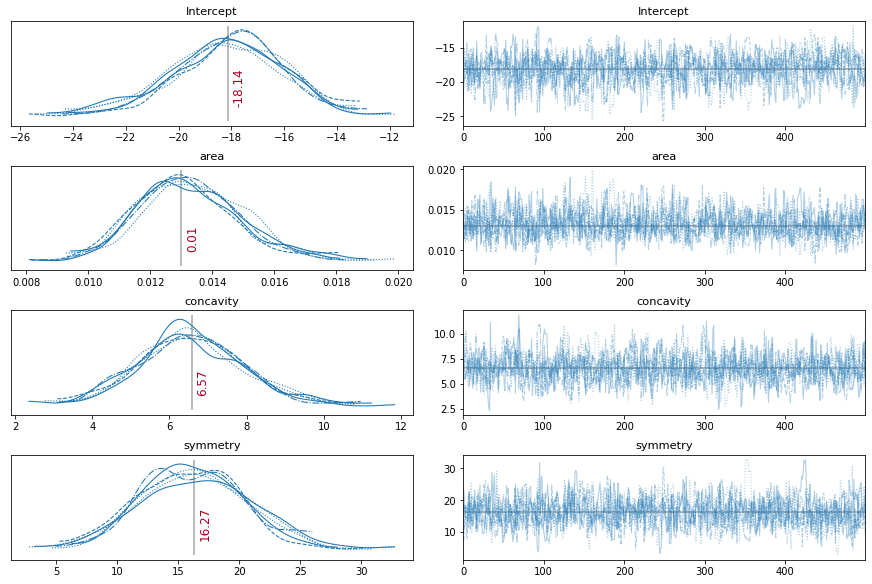

In [15]:
plot_traces(trace)

/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


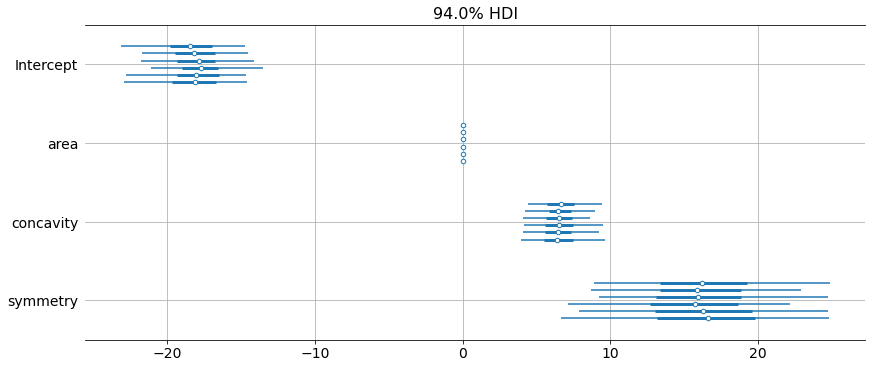

In [16]:
pm.plots.forestplot(trace, figsize=(12, 5))
# The creates a matplotlib plot, so we can modify with standard matplotlib commands
plt.grid()  # add a grid to the plot

In [17]:
cols =["Diagnosis", "radius", "texture",
       "perimeter", "area", "smoothness",
       "compactness", "concavity", "concavePoints",
       "symmetry", "fractal dimension"]

dat_avg = pd.read_csv("wdbc.data", header=None, na_values = "none",
                  usecols = [1,2,3,4,5,6,7,8,9,10,11], names=cols)
dat_avg

Diagnosis  radius  texture  perimeter    area  smoothness  compactness  \
0           M   17.99    10.38     122.80  1001.0     0.11840      0.27760   
1           M   20.57    17.77     132.90  1326.0     0.08474      0.07864   
2           M   19.69    21.25     130.00  1203.0     0.10960      0.15990   
3           M   11.42    20.38      77.58   386.1     0.14250      0.28390   
4           M   20.29    14.34     135.10  1297.0     0.10030      0.13280   
..        ...     ...      ...        ...     ...         ...          ...   
564         M   21.56    22.39     142.00  1479.0     0.11100      0.11590   
565         M   20.13    28.25     131.20  1261.0     0.09780      0.10340   
566         M   16.60    28.08     108.30   858.1     0.08455      0.10230   
567         M   20.60    29.33     140.10  1265.0     0.11780      0.27700   
568         B    7.76    24.54      47.92   181.0     0.05263      0.04362   

     concavity  concavePoints  symmetry  fractal dimension  
0      0.30010        0.14710    0.2419            0.07871  
1      0.08690        0.07017    0.1812            0.05667  
2      0.19740        0.12790    0.2069            0.05999  
3      0.24140        0.10520    0.2597            0.09744  
4      0.19800        0.10430    0.1809            0.05883  
..         ...            ...       ...                ...  
564    0.24390        0.13890    0.1726            0.05623  
565    0.14400        0.09791    0.1752            0.05533  
566    0.09251        0.05302    0.1590            0.05648  
567    0.35140        0.15200    0.2397            0.07016  
568    0.00000        0.00000    0.1587            0.05884  

[569 rows x 11 columns]

In [18]:
dat_avg.corr()

radius   texture  perimeter      area  smoothness  \
radius             1.000000  0.323782   0.997855  0.987357    0.170581   
texture            0.323782  1.000000   0.329533  0.321086   -0.023389   
perimeter          0.997855  0.329533   1.000000  0.986507    0.207278   
area               0.987357  0.321086   0.986507  1.000000    0.177028   
smoothness         0.170581 -0.023389   0.207278  0.177028    1.000000   
compactness        0.506124  0.236702   0.556936  0.498502    0.659123   
concavity          0.676764  0.302418   0.716136  0.685983    0.521984   
concavePoints      0.822529  0.293464   0.850977  0.823269    0.553695   
symmetry           0.147741  0.071401   0.183027  0.151293    0.557775   
fractal dimension -0.311631 -0.076437  -0.261477 -0.283110    0.584792   

                   compactness  concavity  concavePoints  symmetry  \
radius                0.506124   0.676764       0.822529  0.147741   
texture               0.236702   0.302418       0.293464  0.071401   
perimeter             0.556936   0.716136       0.850977  0.183027   
area                  0.498502   0.685983       0.823269  0.151293   
smoothness            0.659123   0.521984       0.553695  0.557775   
compactness           1.000000   0.883121       0.831135  0.602641   
concavity             0.883121   1.000000       0.921391  0.500667   
concavePoints         0.831135   0.921391       1.000000  0.462497   
symmetry              0.602641   0.500667       0.462497  1.000000   
fractal dimension     0.565369   0.336783       0.166917  0.479921   

                   fractal dimension  
radius                     -0.311631  
texture                    -0.076437  
perimeter                  -0.261477  
area                       -0.283110  
smoothness                  0.584792  
compactness                 0.565369  
concavity                   0.336783  
concavePoints               0.166917  
symmetry                    0.479921  
fractal dimension           1.000000

In [19]:
import matplotlib.pyplot as plt

In [20]:
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

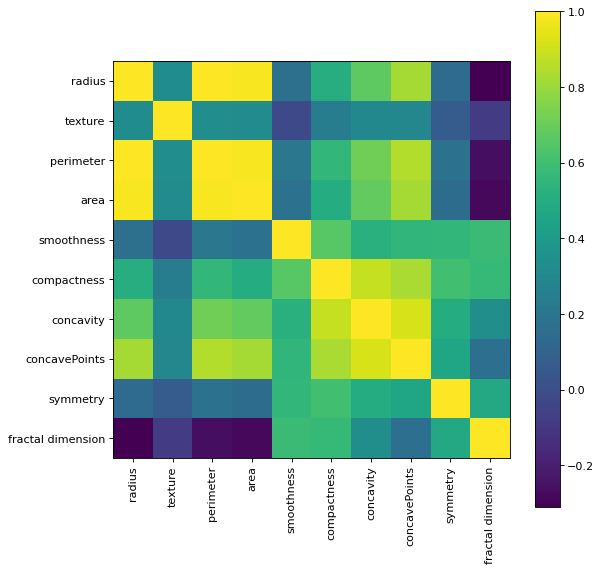

In [21]:
plotCorrelationMatrix(dat_avg, 8)

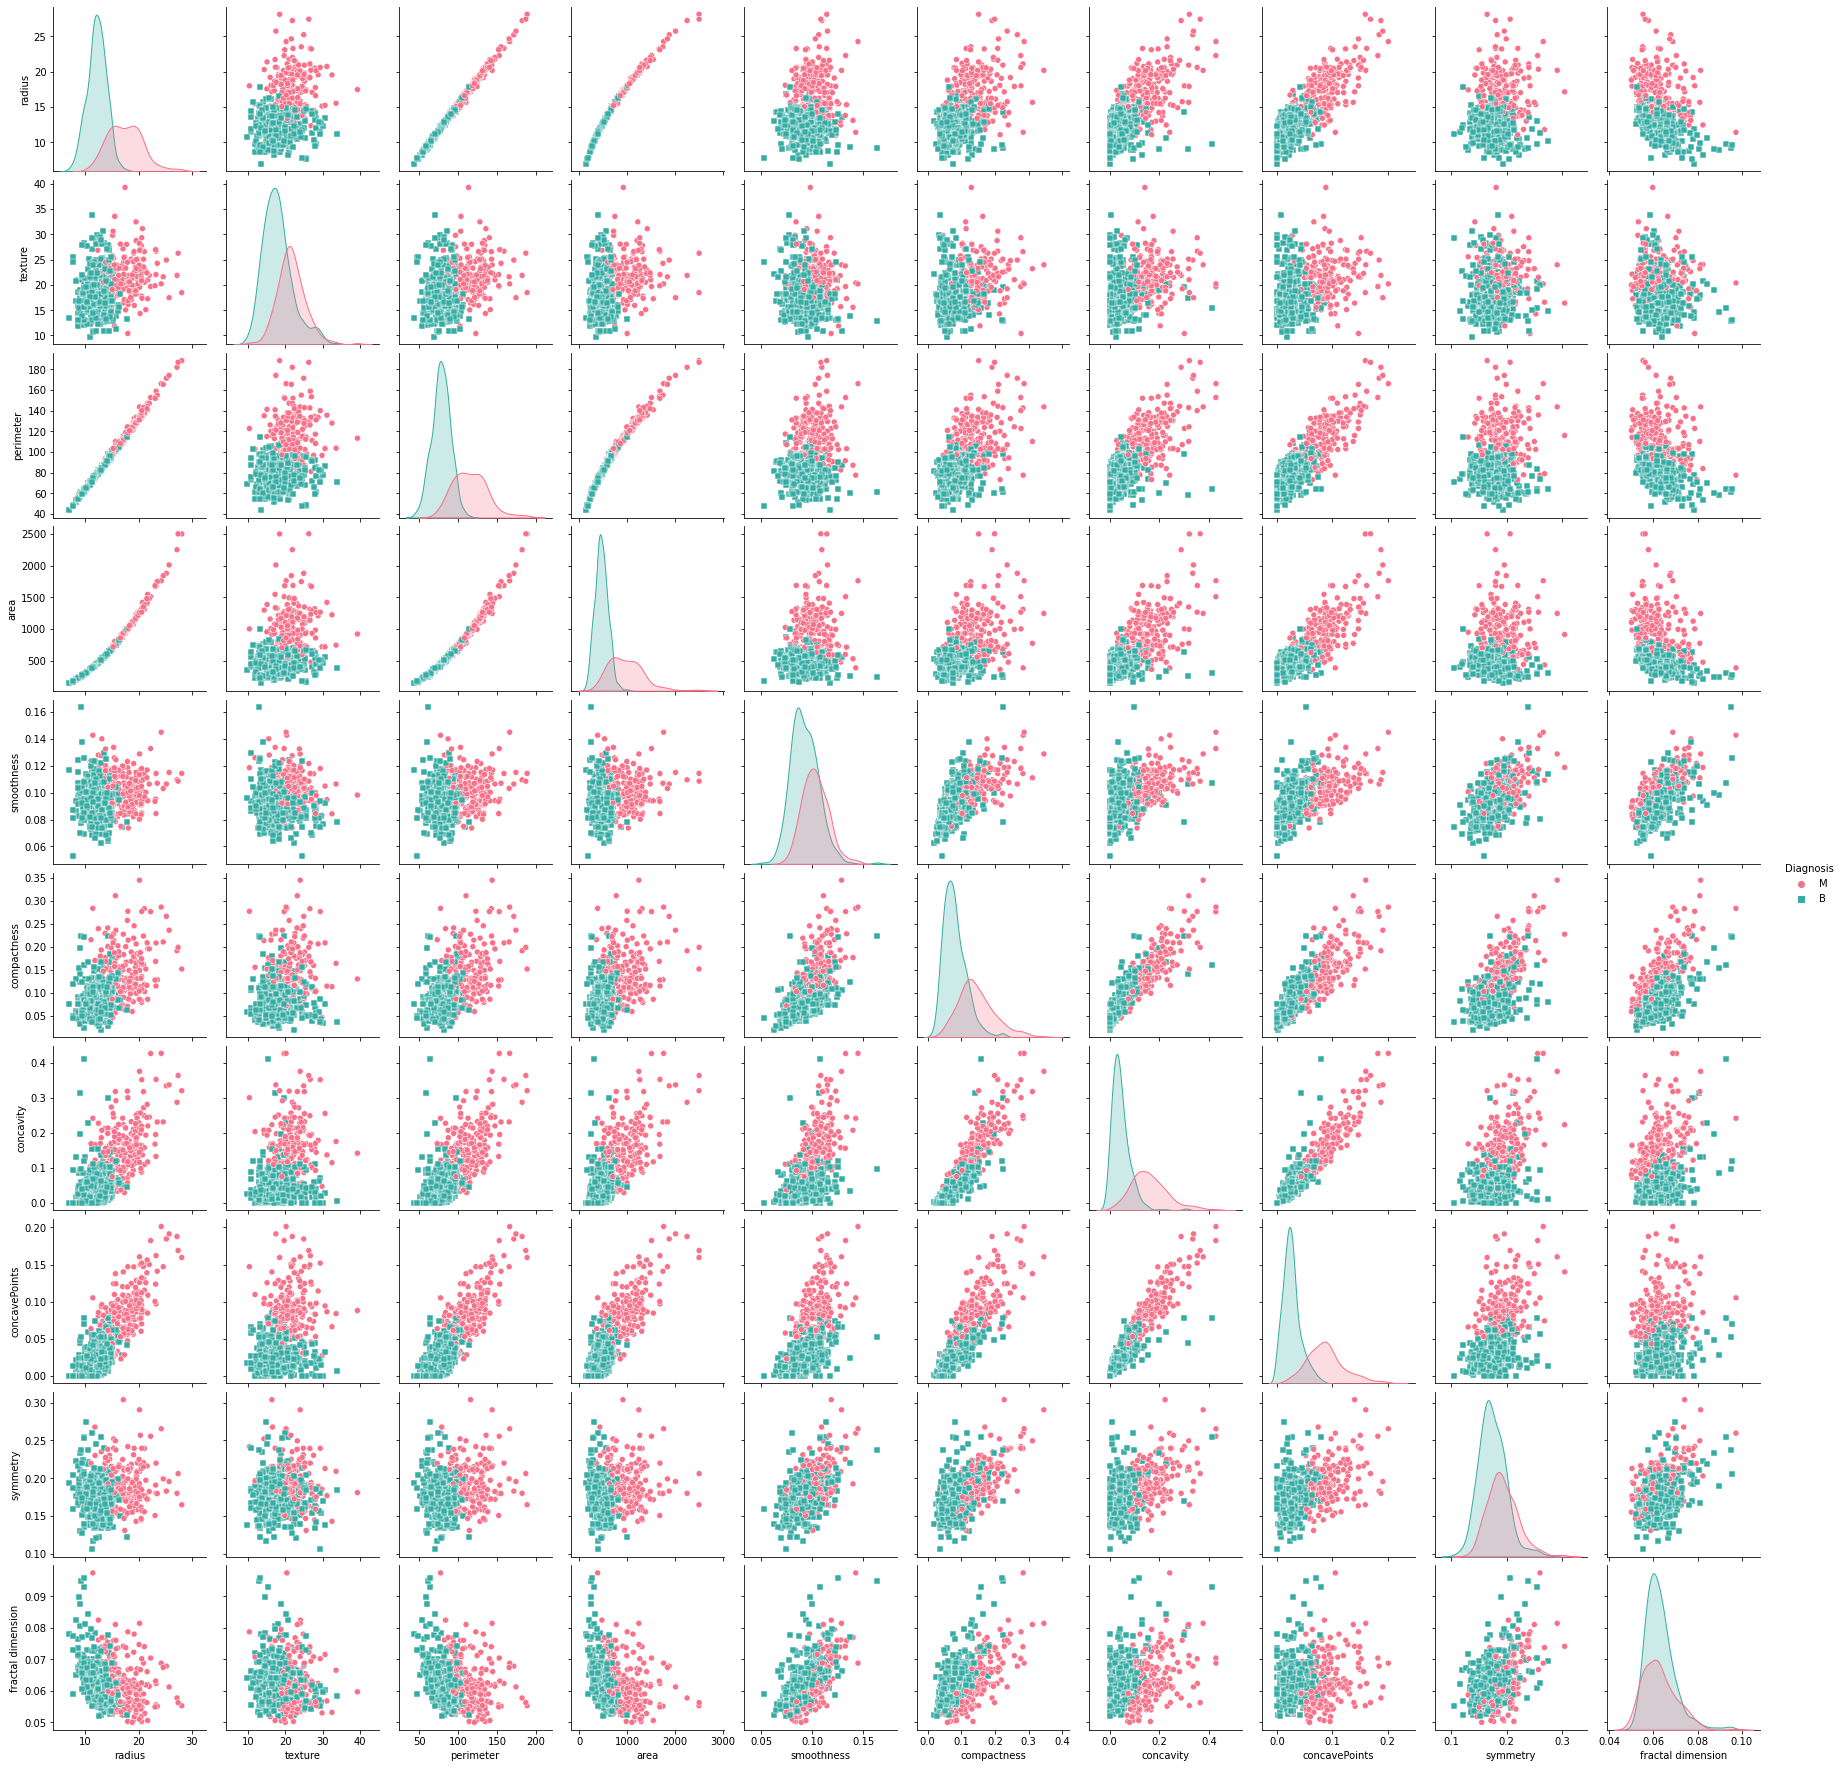

In [22]:
g = sns.pairplot(dat_avg, hue="Diagnosis", palette="husl", markers=["o", "s"])

In [23]:
X_avg=dat_avg.drop(columns=['Diagnosis', 'radius', 'perimeter', 'smoothness',
                    'fractal dimension', 'concavePoints', 'compactness',
                    'texture', 'area'])
X_avg

concavity  symmetry
0      0.30010    0.2419
1      0.08690    0.1812
2      0.19740    0.2069
3      0.24140    0.2597
4      0.19800    0.1809
..         ...       ...
564    0.24390    0.1726
565    0.14400    0.1752
566    0.09251    0.1590
567    0.35140    0.2397
568    0.00000    0.1587

[569 rows x 2 columns]

In [69]:
X_avg=dat_avg.drop(columns=['Diagnosis', 'symmetry', 'radius', 'perimeter',
                    'fractal dimension', 'concavePoints', 'compactness', 'smoothness', 'area'])
X_avg

texture  concavity
0      10.38    0.30010
1      17.77    0.08690
2      21.25    0.19740
3      20.38    0.24140
4      14.34    0.19800
..       ...        ...
564    22.39    0.24390
565    28.25    0.14400
566    28.08    0.09251
567    29.33    0.35140
568    24.54    0.00000

[569 rows x 2 columns]

In [25]:
#https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
from statsmodels.stats.outliers_influence import variance_inflation_factor   

In [26]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X_avg.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_avg.values, i) 
                          for i in range(len(X_avg.columns))] 
  
print(vif_data)

      feature       VIF
0  smoothness  2.626344
1   concavity  2.626344


In [63]:
data_avg = dat_avg[['Diagnosis', 'concavity', 'texture']]

In [28]:
def plot_traces(traces, retain=0):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''
    ax = pm.traceplot(traces[-retain:],
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(traces[-retain:]).iterrows()]))
    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')

In [59]:
with pm.Model() as model:
    betas = pm.glm.GLM.from_formula(formula = 'Diagnosis~concavity+symmetry+radius+perimeter+concavePoints+compactness+texture+area',
                            data = dat_avg, 
                            family = pm.glm.families.Binomial())
    pred = pm.Data("pred", data_avg.concavity)
    

    trace = pm.sample(500, step = pm.NUTS(target_accept = 0.99), cores = 6, tune=5000) # change cores if you need to 

Multiprocess sampling (6 chains in 6 jobs)
NUTS: [area, texture, compactness, concavePoints, perimeter, radius, symmetry, concavity, Intercept]


Sampling 6 chains for 5_000 tune and 500 draw iterations (30_000 + 3_000 draws total) took 4987 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [60]:
trace.varnames

['Intercept',
 'concavity',
 'symmetry',
 'radius',
 'perimeter',
 'concavePoints',
 'compactness',
 'texture',
 'area']

/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


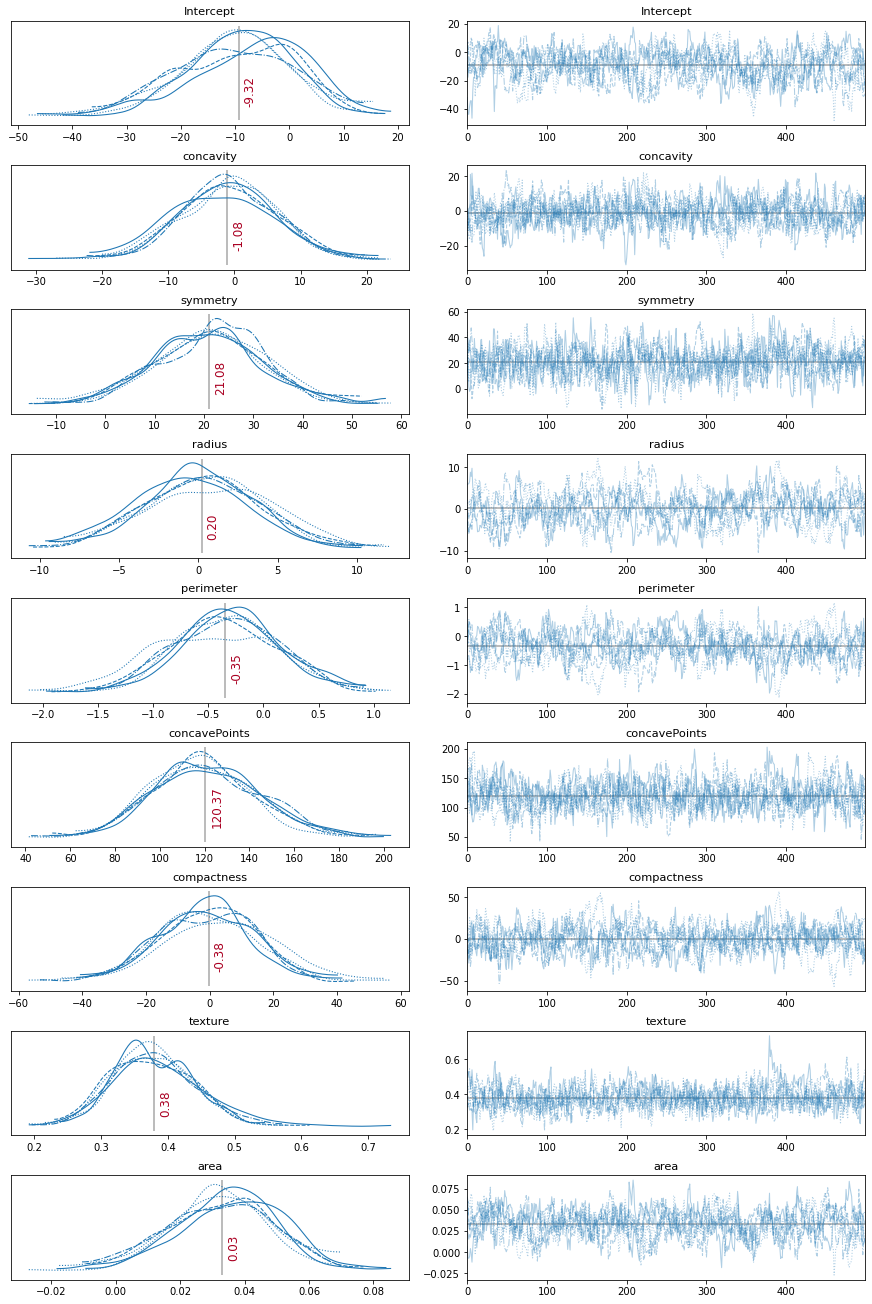

In [61]:
plot_traces(trace)

/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


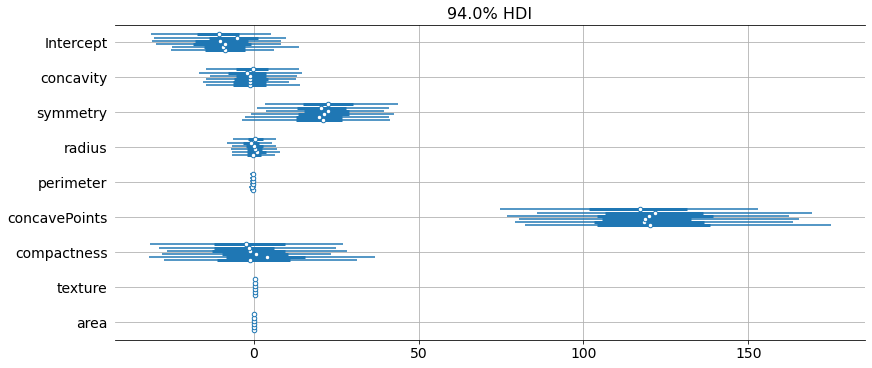

In [62]:
pm.plots.forestplot(trace, figsize=(12, 5))
# The creates a matplotlib plot, so we can modify with standard matplotlib commands
plt.grid()  # add a grid to the plot

In [64]:
with pm.Model() as model:
    betas = pm.glm.GLM.from_formula(formula = 'Diagnosis~concavity+texture',
                            data = data_avg, 
                            family = pm.glm.families.Binomial())
    pred = pm.Data("pred", data_avg.concavity)
    

    trace = pm.sample(500, step = pm.NUTS(target_accept = 0.99), cores = 6, tune=5000) # change cores if you need to 

Multiprocess sampling (6 chains in 6 jobs)
NUTS: [texture, concavity, Intercept]


Sampling 6 chains for 5_000 tune and 500 draw iterations (30_000 + 3_000 draws total) took 215 seconds.
The number of effective samples is smaller than 25% for some parameters.


/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


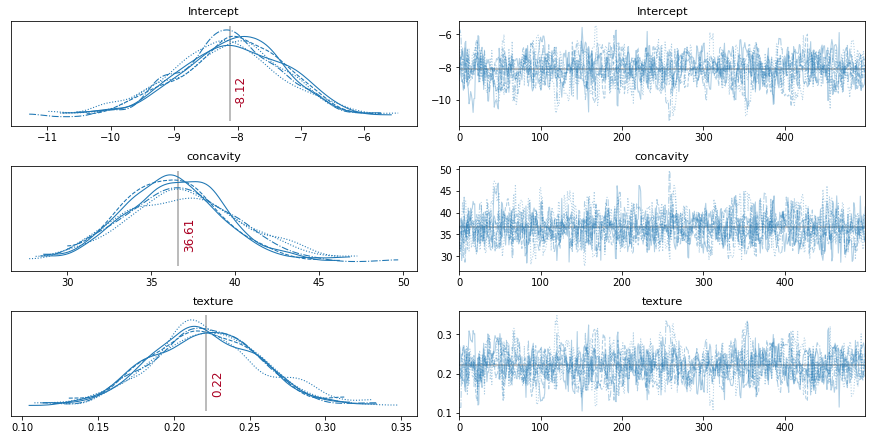

In [65]:
plot_traces(trace)

/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


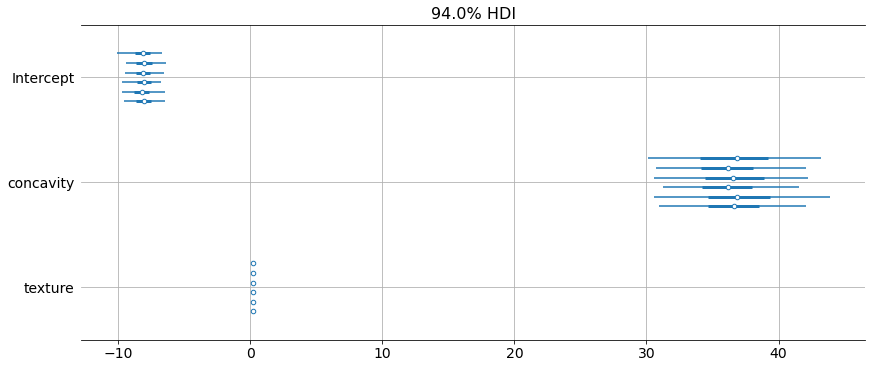

In [66]:
pm.plots.forestplot(trace, figsize=(12, 5))
# The creates a matplotlib plot, so we can modify with standard matplotlib commands
plt.grid()  # add a grid to the plot

In [33]:
#with model:
#    ppc = pm.sample_posterior_predictive(trace, samples=500)

In [34]:
with model:
    p = pm.Deterministic("p", pm.math.invlogit(betas['Intercept'] + betas['concavity'] * pred))

In [54]:
predictors_out_of_sample = dat_worst['concavity']
outcomes_out_of_sample = dat_worst['Diagnosis']
with model:
    # update values of predictors:
    pm.set_data({"pred": predictors_out_of_sample})
    # use the updated values and predict outcomes and probabilities:
    model_preds = pm.sample_posterior_predictive(
        trace, var_names = ["p"],random_seed = 101
    )["p"]

/opt/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),
/opt/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


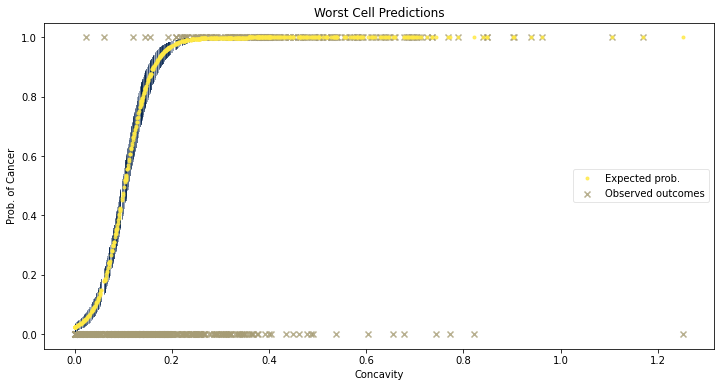

In [56]:
_, ax = plt.subplots(figsize=(12, 6))

# uncertainty about the estimates:
ax.plot(
    [predictors_out_of_sample, predictors_out_of_sample],
    az.hpd(model_preds).T,
    lw=1,
    color="#00204C",
    alpha=0.4,
)
# expected probability of success:
ax.plot(
    predictors_out_of_sample,
    model_preds.mean(0),
    "o",
    ms=3,
    color="#FFE945",
    alpha=0.8,
    label="Expected prob.",
)
numerical_diagnosis = []

for x in outcomes_out_of_sample:
        if x == 'M':
            y=1
        elif x == 'B':
            y=0
        numerical_diagnosis.append(y)
        
           
# actual outcomes:
ax.scatter(
    
    x=predictors_out_of_sample,
    y=numerical_diagnosis,
    marker="x",
    color="#A69C75",
    alpha=0.8,
    label="Observed outcomes",
)



ax.set_xlabel("Concavity")
ax.set_ylabel("Prob. of Cancer")
ax.set_title("Worst Cell Predictions")
ax.legend(fontsize=10, frameon=True, framealpha=0.5);

In [38]:
dat_worst['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [88]:
dat_worst[(dat_worst['concavity']<.102) & (dat_avg['Diagnosis']=='B')].count()

Diagnosis            122
radius               122
texture              122
perimeter            122
area                 122
smoothness           122
compactness          122
concavity            122
concavePoints        122
symmetry             122
fractal dimension    122
dtype: int64

In [52]:
predictors_out_of_sample = dat_avg['concavity']
outcomes_out_of_sample = dat_avg['Diagnosis']
with model:
    # update values of predictors:
    pm.set_data({"pred": predictors_out_of_sample})
    # use the updated values and predict outcomes and probabilities:
    model_preds = pm.sample_posterior_predictive(
        trace, var_names = ["p"],random_seed = 101
    )["p"]

/opt/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),
/opt/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


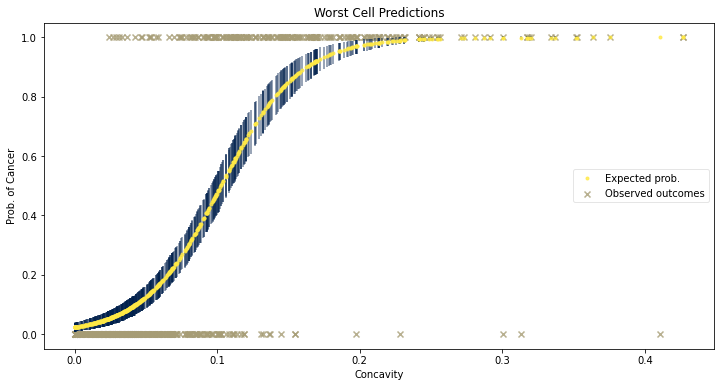

In [53]:
_, ax = plt.subplots(figsize=(12, 6))

# uncertainty about the estimates:
ax.plot(
    [predictors_out_of_sample, predictors_out_of_sample],
    az.hpd(model_preds).T,
    lw=2,
    color="#00204C",
    alpha=0.4,
)
# expected probability of success:
ax.plot(
    predictors_out_of_sample,
    model_preds.mean(0),
    "o",
    ms=3,
    color="#FFE945",
    alpha=0.8,
    label="Expected prob.",
)
numerical_diagnosis = []

for x in outcomes_out_of_sample:
        if x == 'M':
            y=1
        elif x == 'B':
            y=0
        numerical_diagnosis.append(y)
        
            
# actual outcomes:
ax.scatter(
    
    x=predictors_out_of_sample,
    y=numerical_diagnosis,
    marker="x",
    color="#A69C75",
    alpha=0.8,
    label="Observed outcomes",
)



ax.set_xlabel("Concavity")
ax.set_ylabel("Prob. of Cancer")
ax.set_title("Worst Cell Predictions")
ax.legend(fontsize=10, frameon=True, framealpha=0.5);

In [71]:
dat_avg['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [84]:
dat_avg[(dat_avg['concavity']<.102) & (dat_avg['Diagnosis']=='B')].count()

Diagnosis            333
radius               333
texture              333
perimeter            333
area                 333
smoothness           333
compactness          333
concavity            333
concavePoints        333
symmetry             333
fractal dimension    333
dtype: int64

In [ ]:
model_preds.mean(0)

In [75]:
x = list(zip(model_preds.mean(0), predictors_out_of_sample))
r = pd.DataFrame(x)
r

0       1
0    1.000000  0.7119
1    0.993620  0.2416
2    0.999996  0.4504
3    1.000000  0.6869
4    0.999975  0.4000
..        ...     ...
564  0.999983  0.4107
565  0.999622  0.3215
566  0.999804  0.3403
567  1.000000  0.9387
568  0.022414  0.0000

[569 rows x 2 columns]

In [82]:
r[(r[1]>.098) & (r[1]<.11)]

0        1
51   0.521786  0.10500
69   0.511634  0.10390
130  0.467772  0.09915
136  0.518096  0.10460
166  0.519019  0.10470
231  0.557561  0.10890
278  0.530998  0.10600
325  0.494077  0.10200
338  0.526395  0.10550
344  0.555738  0.10870
348  0.459309  0.09823
387  0.559382  0.10910
411  0.537433  0.10670
491  0.519942  0.10480
520  0.475237  0.09996
543  0.532838  0.10620
545  0.520864  0.10490